In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx

/home/kubicaj/python_venvs/pyEnv_PPI/lib64/python3.9/site-packages/networkx/utils/backends.py:135: RuntimeWarning: networkx backend defined more than once: nx-loopback
  backends.update(_get_backends("networkx.backends"))


In [2]:
interactome_df = pd.read_csv('./data/Interactome_human.tsv', sep='\t', header=None)
interactome_df.head()

,0,1,2
0,ENSG00000065559,ENSG00000128591,1
1,ENSG00000077522,ENSG00000138347,1
2,ENSG00000179348,ENSG00000140464,1
3,ENSG00000143761,ENSG00000125447,1
4,ENSG00000132254,ENSG00000134287,1


### Run some tests of networkx to see how it works

In [114]:
G = nx.from_pandas_edgelist(interactome_df.iloc[:100, :], 0, 1, edge_attr=True)

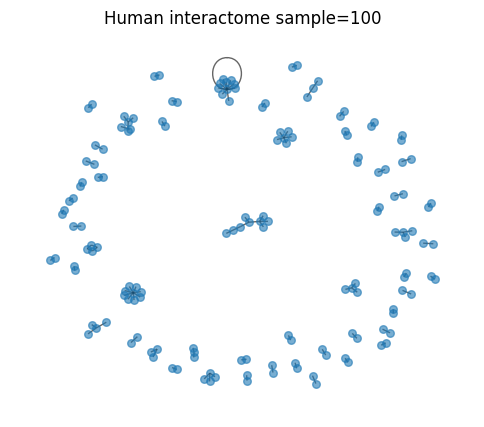

In [115]:
plt.figure(figsize=(6, 5))
ax = plt.gca()
ax.set_title("Human interactome sample=100")
nx.draw_networkx(G, with_labels=False, node_size=30, alpha=0.6, ax=ax)
_ = ax.axis('off')

In [116]:
# Get node with highest degree
sorted(G.degree, key=lambda x: x[1], reverse=True)[:3]

[('ENSG00000073111', 11), ('ENSG00000204469', 8), ('ENSG00000171791', 5)]

In [117]:
sub_G = G.subgraph([n for n in G.neighbors("ENSG00000073111")])

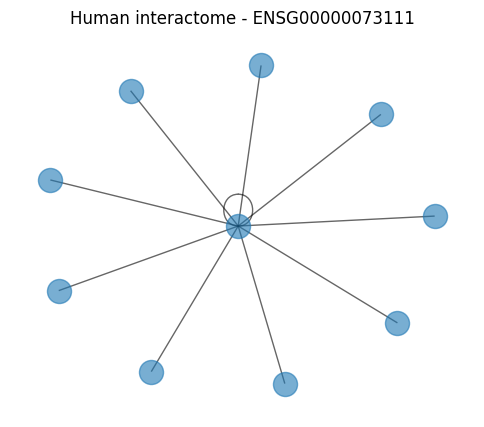

In [118]:
plt.figure(figsize=(6, 5))
ax = plt.gca()
ax.set_title("Human interactome - ENSG00000073111")
nx.draw_networkx(sub_G, with_labels=False, node_size=300, alpha=0.6, ax=ax)
_ = ax.axis('off')

### Analyze the interactome

In [125]:
G = nx.from_pandas_edgelist(interactome_df, 0, 1, edge_attr=True)

In [153]:
node_highest_degree = sorted(G.degree, key=lambda x: x[1], reverse=True)[0][0]
print(f"Node with the highest degree: {node_highest_degree}")
sub_G = G.subgraph([n for n in G.neighbors(node_highest_degree)])
sub_G = nx.Graph(sub_G) # unfreeze the graph
sub_G.remove_edges_from(nx.selfloop_edges(sub_G)) # removing self-loops

Node with the highest degree: ENSG00000204713


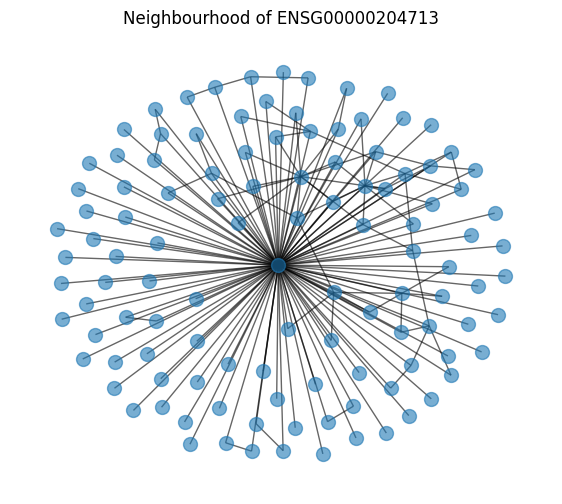

In [160]:
plt.figure(figsize=(7, 6))
ax = plt.gca()
ax.set_title(f"Neighbourhood of {node_highest_degree}")
nx.draw_networkx(sub_G, with_labels=False, node_size=100, alpha=0.6, ax=ax)
_ = ax.axis('off')

In [158]:
sub_G_df = nx.to_pandas_edgelist(sub_G)
sub_G_df.head()

,source,target,2
0,ENSG00000143621,ENSG00000204713,1
1,ENSG00000131149,ENSG00000204713,1
2,ENSG00000117280,ENSG00000204713,1
3,ENSG00000263528,ENSG00000183735,1
4,ENSG00000263528,ENSG00000104365,1


### Scoring tests

In [3]:
G = nx.from_pandas_edgelist(interactome_df, 0, 1, edge_attr=True)

In [4]:
# get node neighbourhood, e.g. ENSG00000204713
sub_G = G.subgraph([n for n in G.neighbors("ENSG00000204713")])

In [5]:
# get size of neighbourhood
size = G.subgraph([n for n in G.neighbors("ENSG00000204713")]).size()
size

208

In [6]:
# check if ENSG00000143621 in neighbourhood of ENSG00000204713 -> True
sub_G.has_node("ENSG00000143621")

True

In [7]:
# check if any node in neighbourhood is a candidate gene
candidates = pd.read_pickle("./data/candidateGenesList.p")
candidates_in_neighbourhood = [x for x in [n for n in sub_G.nodes()] if x in candidates]
candidates_in_neighbourhood

['ENSG00000139687']

In [8]:
# remove self-loops
sub_G = nx.Graph(sub_G) # unfreeze the graph
sub_G.remove_edges_from(nx.selfloop_edges(sub_G))

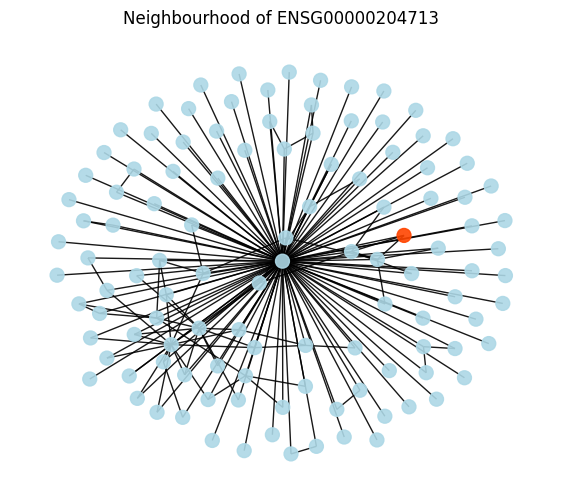

In [12]:
color_map = ['orangered' if node in candidates_in_neighbourhood else 'lightblue' for node in sub_G]

plt.figure(figsize=(7, 6))
ax = plt.gca()
ax.set_title(f"Neighbourhood of ENSG00000204713")
nx.draw_networkx(sub_G, with_labels=False, node_size=100, alpha=0.9, ax=ax, node_color=color_map)
_ = ax.axis('off')